### Esercitazione 03.1 

Analizziamo il prezzo delle opzioni europee **call** e **put** nel contesto della teoria di **Black-Scholes**, che assume che il prezzo dell’attività sottostante segua un moto browniano geometrico (GBM) con tasso di interesse privo di rischio costante $r$ e volatilità costante $\sigma$.

Le formule chiuse per il prezzo delle opzioni in un tempo $t < T$ sono:

- **Opzione Call europea**:
  
  $C(S(t), t) = S(t) N(d_1) - K e^{-r(T - t)} N(d_2)$

- **Opzione Put europea**:
  
  $P(S(t), t) = S(t)[N(d_1) - 1] - K e^{-r(T - t)} [N(d_2) - 1]$

dove:

$d_1 = \frac{1}{\sigma \sqrt{T - t}} \left[ \ln\left( \frac{S(t)}{K} \right) + \left(r + \frac{\sigma^2}{2} \right)(T - t) \right]$

$d_2 = d_1 - \sigma \sqrt{T - t}$

e $N(x)$ è la funzione di distribuzione cumulativa (CDF) della gaussiana standard $\sim \mathcal{N}(0,1)$:

$N(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x}{\sqrt{2}} \right) \right]$


Utilizzeremo i seguenti parametri iniziali:

- Prezzo iniziale dell’attività: $S(0) = 100$
- Tempo finale: $T = 1$
- Prezzo di esercizio: $K = 100$
- Tasso di interesse risk-free: $r = 0.1$
- Volatilità: $\sigma = 0.25$

Calcoliamo i prezzi delle opzioni europee **call** e **put** al tempo $t=0$, secondo due approcci differenti:

#### Campionamento diretto del prezzo finale $S(T)$

Sfruttiamo il fatto che, se $S \sim GBM(\mu, \sigma^2)$, allora:

$$
S(T) = S(0) \cdot \exp\left[\left(r - \frac{1}{2}\sigma^2\right)T + \sigma W(T)\right]
$$

dove $W(T) \sim \mathcal{N}(0, T)$ è un moto browniano standard.


#### Campionamento del cammino discretizzato del GBM

Discretizziamo l’intervallo $[0, T]$ in 100 passi temporali, e generiamo il cammino dell’asset usando la relazione ricorsiva:

$$
S(t_{i+1}) = S(t_i) \cdot \exp\left[ \left(r - \frac{1}{2}\sigma^2\right) \Delta t + \sigma Z_{i+1} \sqrt{\Delta t} \right]
$$

dove $Z_i \sim \mathcal{N}(0,1)$ e $\Delta t = \frac{T}{100}$.

Qui in seguito vengono mostrati i risultati delle simulazioni per l' opzione Call e Put nel caso diretto e in quello discretizzato in funzione del numero di blocchi con $M \geq 10^4$ traiettorie simulate.

Per ogni grafico si riportano:
- La stima Monte Carlo del prezzo $C(S(0), 0)$ o $P(S(0), 0)$
- L’**incertezza statistica** calcolata con il metodo del **data blocking**


In [8]:
import matplotlib.pyplot as plt
import numpy as np

dati=np.loadtxt("Es3/Output/dati.csv",delimiter=",")
Ccall=dati[:,0]
err=dati[:,1]
Cput=dati[:,2]
err2=dati[:,3]

datin=np.loadtxt("Es3/Output/ndati.csv",delimiter=",")
Ccalln=datin[:,0]
errn=datin[:,1]
Cputn=datin[:,2]
err2n=datin[:,3]

dati2=np.loadtxt("Es3/Output/input.dat",delimiter=",")
N=int(dati2[0]) #numero di blocchi 
C=dati2[1] #valore teorico di C
P=dati2[2] #valore teorico di P

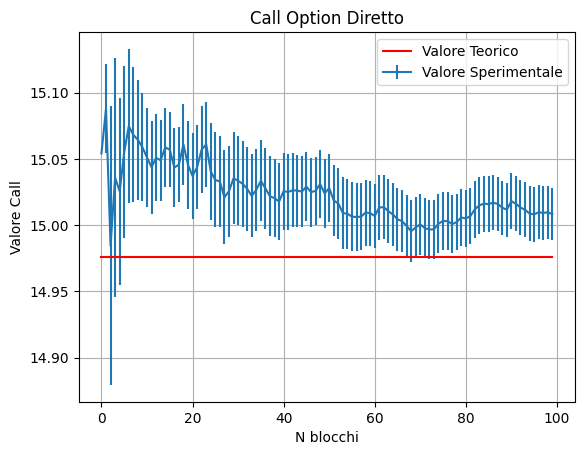

In [9]:
#call con calcolo di S diretto
plt.errorbar(range(0,N),Ccall,yerr=err,label="Valore Sperimentale")
plt.plot(range(0,N),[C]*N,color="red",label="Valore Teorico")
plt.grid()
plt.legend()
plt.xlabel("N blocchi")
plt.ylabel("Valore Call")
plt.title("Call Option Diretto")
plt.show()
plt.close()

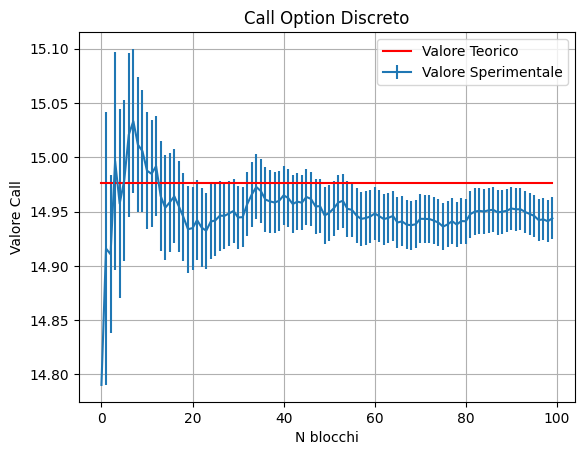

In [10]:
#call con calcolo discreto di S
plt.errorbar(range(0,N),Ccalln,yerr=errn,label="Valore Sperimentale")
plt.plot(range(0,N),[C]*N,color="red",label="Valore Teorico")
plt.grid()
plt.legend()
plt.xlabel("N blocchi")
plt.ylabel("Valore Call")
plt.title("Call Option Discreto")
plt.show()
plt.close()

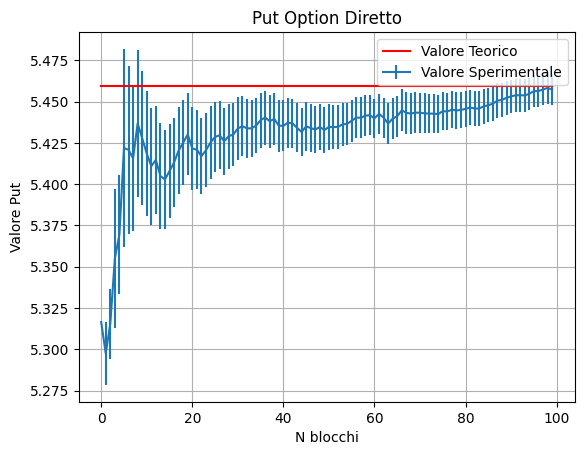

In [11]:
#put con calcolo di S diretto
plt.errorbar(range(0,N),Cput,yerr=err2,label="Valore Sperimentale")
plt.plot(range(0,N),[P]*N,color="red",label="Valore Teorico")
plt.grid()
plt.title("Put Option Diretto")
plt.legend()
plt.xlabel("N blocchi")
plt.ylabel("Valore Put")
plt.show()
plt.close()

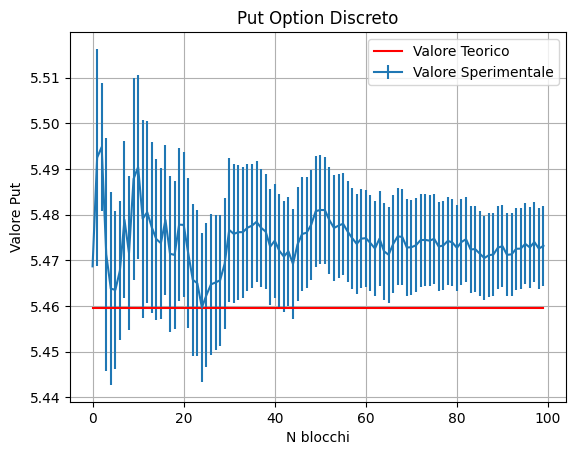

In [12]:
#put con calcolo discreto di S

plt.errorbar(range(0,N),Cputn,yerr=err2n,label="Valore Sperimentale")
plt.plot(range(0,N),[P]*N,color="red",label="Valore Teorico")
plt.grid()
plt.title("Put Option Discreto")
plt.legend()
plt.xlabel("N blocchi")
plt.ylabel("Valore Put")
plt.show()
plt.close()
